# **Project Milestone 2**
 
# **Team**
**Group 4:** 
- Shreya Bakshi           *sb59344*
- Rathi Kannan            *rk27867*
- Gowtami Khambhampati    *gk6952*
- Danqing Wang            *dw33369*

## **Step 2: Microbit program to send a counter back and forth between two microbit devices.**


**Screenshot of microbit code**

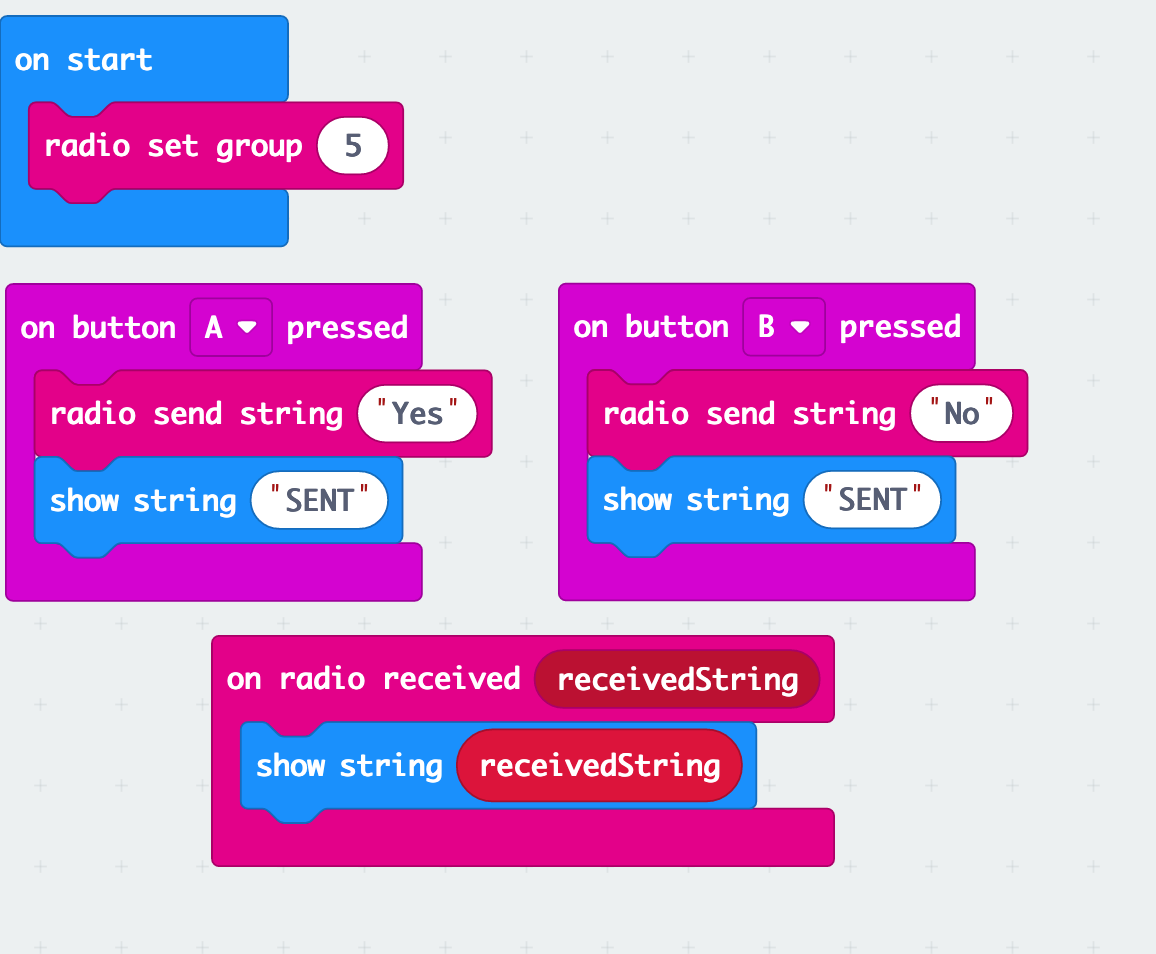

**Resolving conflicts with other groups’ counters?**

Here we set the group or channel as “5”, that means we can send “Yes” or “No” if we press “A” or “B” to the microbit in the channel “5” frequency. We were told to communicate our channel or group values beforehand to connect between 2 microbits. If the group values are not communicated beforehand, and values are same across class then only 1 microbit can send at a time, everyone else can receive. This is because the packet would have been lost if everyone tried to communicate simultaneously. Therefore, by setting a unique group id on the radio button we resolved conflicts with other group's counters.  

**Do you prefer to write this in python or in javascript or in makecode? Why?**

We prefer to write the code in Python or makecode since we are more familiar with Python/makecode than Javascript. We can troubleshoot code in a fundamental way and hence Python is easier for us to understand and to debug.

## **Step 3: What is baud rate?**

The baud rate is the rate at which information is transferred in a communication channel. Baud rate is commonly used when discussing electronics that use serial communication. In the serial port context, "115200 baud" means that the serial port is capable of transferring a maximum of 115200 bits per second. At baud rates above 76,800, the cable length will need to be reduced. The higher the baud rate, the more sensitive the cable becomes to the quality of installation, due to how much of the wire is untwisted around each device.

This is the speed and bit duration for the baud rate we set in our code: 
- Bit/s - 115200 bits/s
- Bit duration - 8.681 mus
- Speed - 14400 bytes/s

Real transmission speed - This shows real transmission speed assuming there is no parity,                                                                    8 data bits and one stop bit
- Speed - 11520 bytes/s
- Byte Duration- 86.806 mus


## **Step 4: Sending Eddystone beacon from the microbit to the Raspberry pi using bluetooth Connection.**

**We add the microbit code to send BLE's as below:**

![picture](https://drive.google.com/uc?id=1azIbwlvhVkdxBRk8YGaAduKN20NKLHHY)

**a)With sudo python3 -m aioblescan -e command - Output as seen on Raspberry Pi: shows url from our group (group4)**

![picture](https://drive.google.com/uc?id=1sJAIBVgRT9hAo2I-bDRdXJqq9BeLtIvN)

**b)We run the below code as-is in Raspberry Pi**

In our case, mile2_4_b.py has the below python code.

In [ ]:
import aioblescan as aiobs 
from aioblescan.plugins import EddyStone 
import asyncio
def _process_packet(data): 
    ev = aiobs.HCI_Event() 
    xx = ev.decode(data) 
    xx = EddyStone().decode(ev) 
    if xx: 
        print("Google beacon: {}".format(xx))
if __name__ == '__main__': 
    mydev = 0 
    event_loop = asyncio.get_event_loop() 
    mysocket = aiobs.create_bt_socket(mydev) 
    fac = event_loop._create_connection_transport(mysocket,aiobs.BLEScanRequester,None,None) 
    conn, btctrl = event_loop.run_until_complete(fac) 
    btctrl.process = _process_packet 
    btctrl.send_scan_request() 
    try: 
        event_loop.run_forever() 
    except KeyboardInterrupt: 
        print('keyboard interrupt') 
    finally: 
        print('closing event loop') 
        btctrl.stop_scan_request() 
        conn.close() 
        event_loop.close()

**Output as seen on Raspberry Pi: shows url from our group (group4)** 

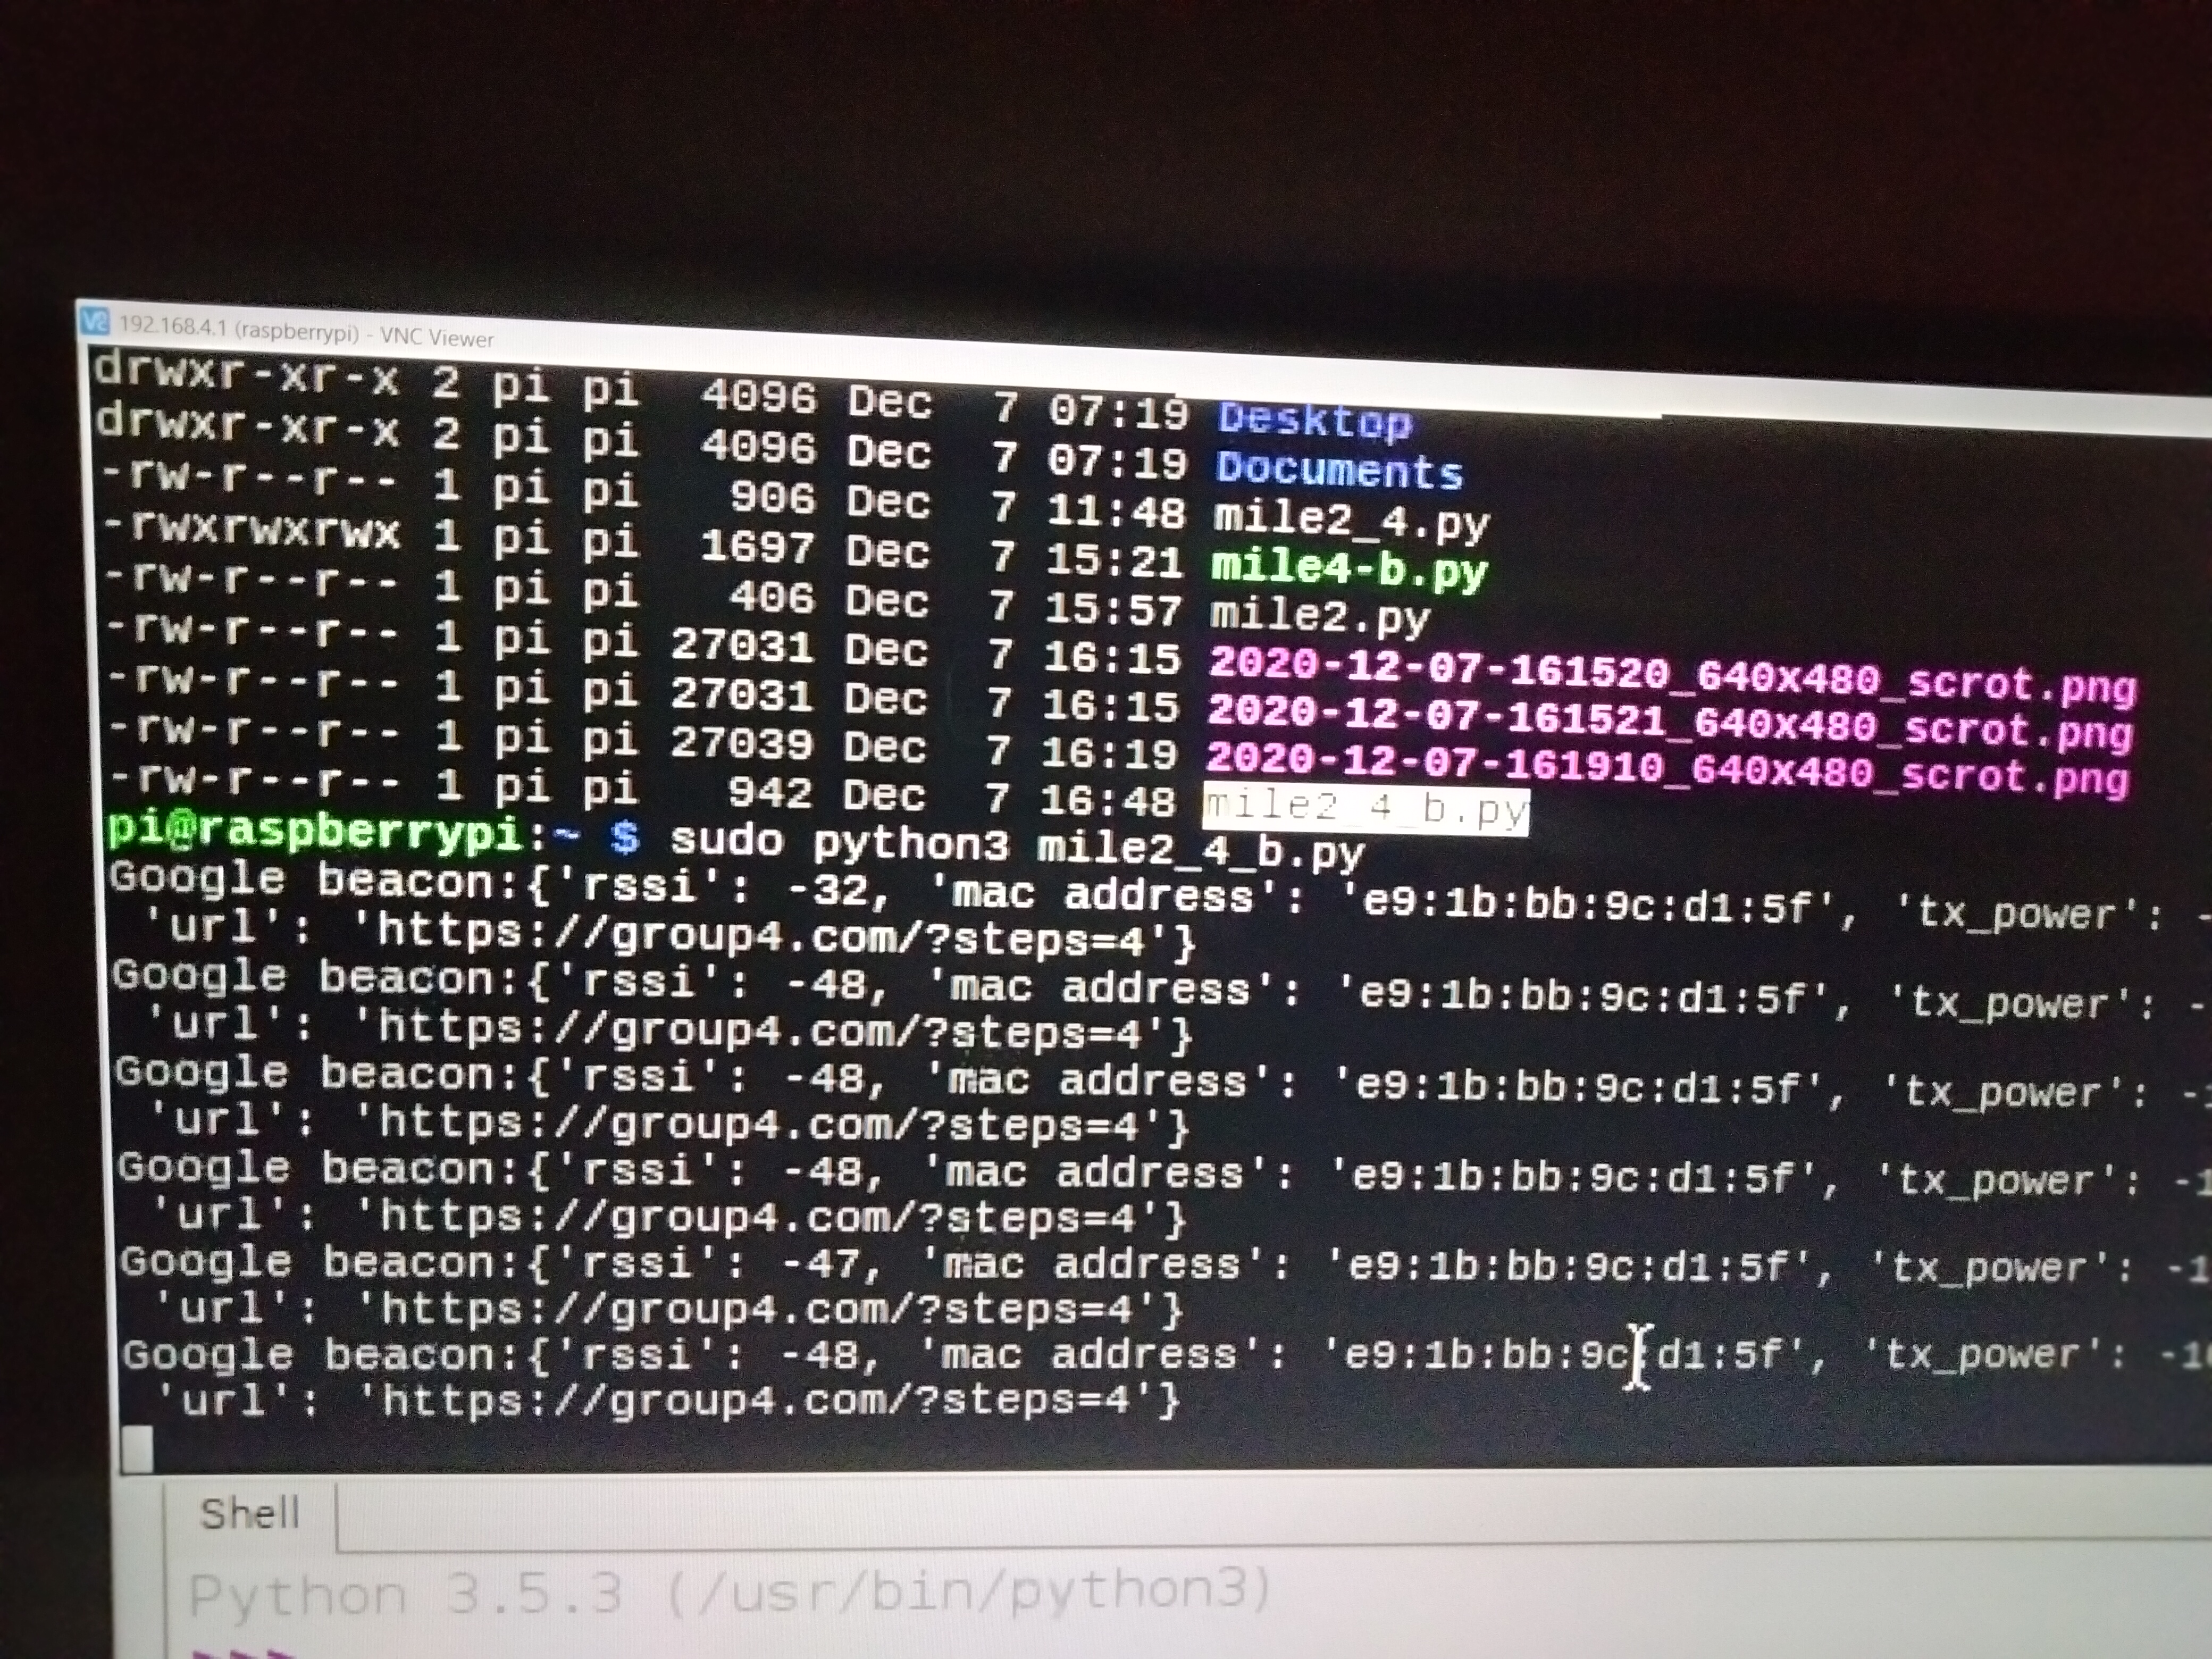

## **Step 5: In your own words, explain what you think is happening in the provided code. You do not need to go line by line, but you should be able to explain the overall flow of activity.** 

**Showing our understanding using flow diagram**

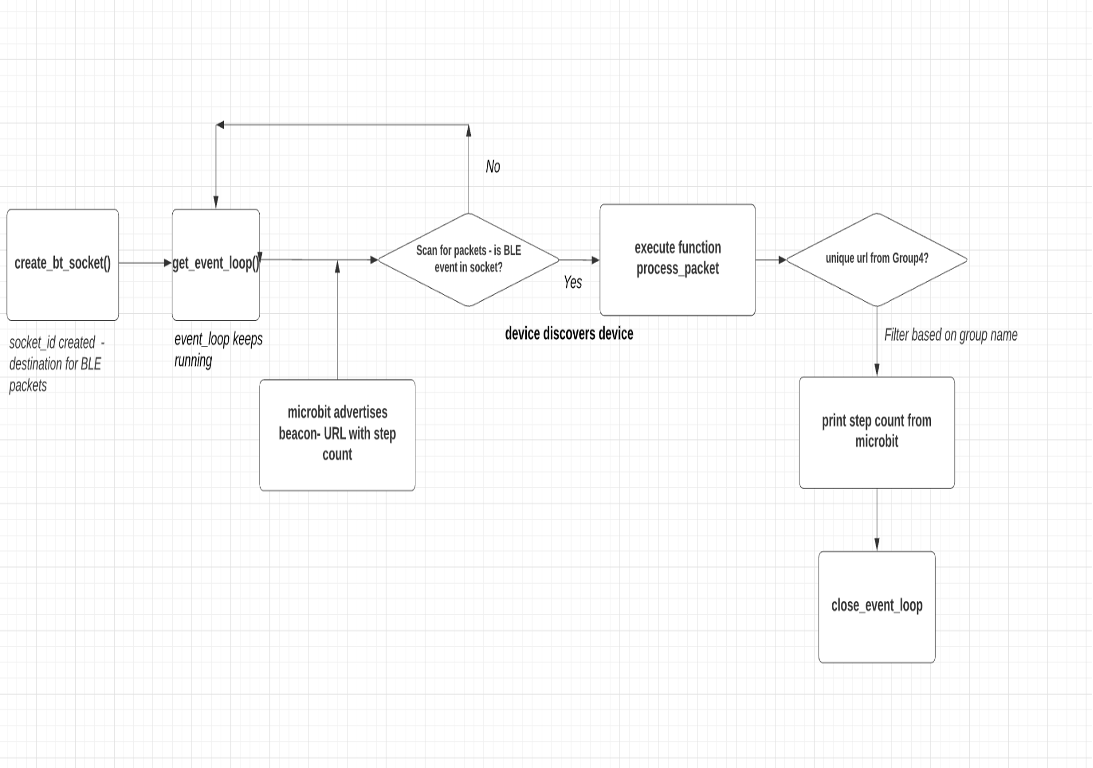



The code creates a socket id (object) which is used as an identification for the OS that my process(executed via .py code) is ready to handle BLE packets. My process launches the event_loop and waits for the BLE or other exceptions (like keyboard interrupt). When we send BLE via microbit, Raspberry Pi's Bluetooth driver receives packets from microbit and notifies OS. Our OS has already established the bluetooth connection via the socket it has created and the process is now ready to receive the BLE. Once Pi's OS discovers the BLE in the socket, we execute the process_packet function to check and display the step count advertised by our group.

## **Step 6: How did you solve the problem (not more than one paragraph)Include a screenshot of the microbit program or the python code for the microbit and a listing of the python receiver on the Raspberry Pi**

We decode the advertised packets from microbit and read the content of the URL sent. We then set up a 'if' condition to check if the URL is being issued by Group4 and resolved the conflict of getting the beacons from other groups. Based on the filter for our specific group, we then print the step count dynamically from our step-counter.


**We change the microbit code to send beacons only on pressing Button A**

![picture](https://drive.google.com/uc?id=1zWZ6gRXVIRja5qROyhfjTtxwkcDXPBAI)

**We then change the Raspberry Pi code to read the beacons only if received from Group4**

In [ ]:
import aioblescan as aiobs 
from aioblescan.plugins import EddyStone 
import asyncio
def _process_packet(data): 
    ev = aiobs.HCI_Event() 
    xx = ev.decode(data) 
    xx = EddyStone().decode(ev) 
    if xx: 
        print("Google beacon: {}".format(xx))
        group = xx.get('url')[8:14]
        if group == 'group4':
          steps = xx.get('ur')[26:]
          dt = datetime.now()
          day = dt.strftime("%A")
          month = dt.strftime("%B")
          date = dt.strftime("%d")
          tme = dt.strftime("%X")

          print("********************")
          print('Step count received at {}, {} {} at {} is {}'.format(day,month,date,tme,steps))
        
if __name__ == '__main__': 
    mydev = 0 
    event_loop = asyncio.get_event_loop() 
    mysocket = aiobs.create_bt_socket(mydev) 
    fac = event_loop._create_connection_transport(mysocket,aiobs.BLEScanRequester,None,None) 
    conn, btctrl = event_loop.run_until_complete(fac) 
    btctrl.process = _process_packet 
    btctrl.send_scan_request() 
    try: 
        event_loop.run_forever() 
    except KeyboardInterrupt: 
        print('keyboard interrupt') 
    finally: 
        print('closing event loop') 
        btctrl.stop_scan_request() 
        conn.close() 
        event_loop.close()

**Output on Raspberry Pi showing date beacon received and step count 1 and 4**

![picture](https://drive.google.com/uc?id=1gEakfeA01BvlnMiJ8tLLM4VwofrFuiGb)

![picture](https://drive.google.com/uc?id=1AbefKi9It6wLKNrzNBkq8scQLRFTGSxY)

## **Video Demonstration**

[Demo](https://drive.google.com/file/d/1dDeMolaqXDMx55C4a-bCM8SWfcGJkOa-/view)